# Python Basics: Data Visualization

In this session, we will explore data visualization with matplotlib. Data visualization is
a vast field that can be explored. In this session, we will highlight the basic functionality
of matplotlib and the most popular plot types such as histogram, line-plot, etc.

For that, we will visualize the unemployment rate of certain countries.


Set up the working environment first and load the necessary packages.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Load Unemployment Rate first

data_GER = pd.read_csv('UR_GER.csv')
data_JPN = pd.read_csv('UR_JPN.csv')
data_AUS = pd.read_csv('UR_AUS.csv')
data_KOR = pd.read_csv('UR_KOR.csv')


If you wish, try to explore some properties of the given data.

In [3]:
# EXERICSE: For a given dataset, find out the datatypes that are contained in the dataframe.

data_GER.dtypes


TIME     object
UR      float64
dtype: object

In [4]:
data_GER['TIME'].dtype

dtype('O')

dtype 'O' signals a mixture of values in this time series. We want 'TIME' to represent the time
as a datetime object.

In the next short exercise, transform the 'TIME' column into a datetime object and set is
as the index, i.e. row label. Do this efficiently for both dataframes.

In [5]:
# EXERICSE

UR=[data_GER, data_JPN, data_AUS, data_KOR]

for data in UR:
    data['TIME'] = pd.to_datetime(data['TIME'])
    data.set_index('TIME', inplace=True)

In [6]:
data_GER

,UR
TIME,
1991-01-01,5.525000
1992-01-01,6.566667
1993-01-01,7.791667
1994-01-01,8.450000
1995-01-01,8.250000
1996-01-01,8.941667
1997-01-01,9.675000
1998-01-01,9.450000
1999-01-01,8.625000


In [7]:
data_GER.index

DatetimeIndex(['1991-01-01', '1992-01-01', '1993-01-01', '1994-01-01',
               '1995-01-01', '1996-01-01', '1997-01-01', '1998-01-01',
               '1999-01-01', '2000-01-01', '2001-01-01', '2002-01-01',
               '2003-01-01', '2004-01-01', '2005-01-01', '2006-01-01',
               '2007-01-01', '2008-01-01', '2009-01-01', '2010-01-01',
               '2011-01-01', '2012-01-01', '2013-01-01', '2014-01-01',
               '2015-01-01', '2016-01-01', '2017-01-01', '2018-01-01',
               '2019-01-01'],
              dtype='datetime64[ns]', name='TIME', freq=None)

## Basic Plotting: One Axe

A classical figure contains a fig and ax object. The fiq object is as the name suggests, the
"container" of your figure, the white canvas so to speak. The ax object "describes" the content
that is "put" on the canvas. Customization is done with the ax object.

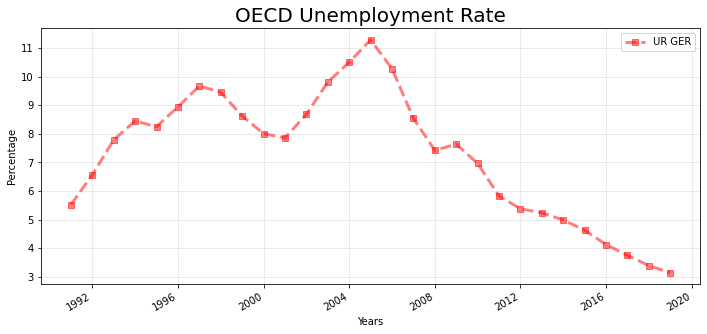

In [8]:
# Initialize plot objects
fig, ax = plt.subplots()

# Define size of figure
fig.set_size_inches(10, 5)

# Plot data and customize appearance
ax.plot(data_GER,
        marker="s",
        color='r',
        linestyle='--',
        linewidth=3,
        alpha=0.5,
        label='UR GER')


# Customize axes labels
ax.set_xlabel('Years')
ax.set_ylabel('Percentage')


# Customize title
ax.set_title("OECD Unemployment Rate", fontsize=20)


# Add a grid
plt.grid(alpha=0.3)


# Add legend (use label= method in .plt() instead of passing a list to .legend()
plt.legend()


# Automatic formatting
plt.tight_layout()              # adjust ax to fit in fig area
plt.gcf().autofmt_xdate()       # format dates for readability

# Show the plot
plt.show()

# Save plot
# plt.savefig('plot.png')  # saved into main directory

## Basic Plotting: Multiple Axes

Using the same plotting grammar, multiple plots can be drawn in a figure simply by declaring
more axes. The following two examples demonstrate the logic of subplots.

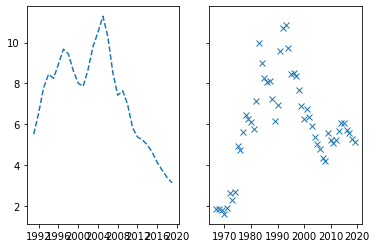

In [9]:
fig, ax = plt.subplots(1, 2, sharey=True)         # creates array of axes, here: 1 x 2d arrays
ax[0].plot(data_GER, linestyle = '--')
ax[1].plot(data_AUS, linestyle='None', marker='x')
plt.show()


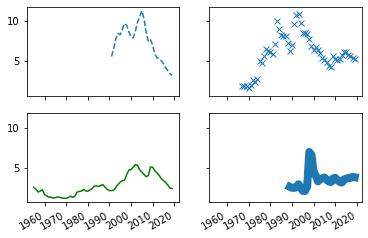

In [10]:
fig, ax = plt.subplots(2, 2, sharey=True, sharex=True)         # creates array of axes, here: 2 x 2d arrays
ax[0, 0].plot(data_GER, linestyle = '--')
ax[1, 0].plot(data_JPN, color='g')
ax[0, 1].plot(data_AUS, linestyle='None', marker='x')
ax[1, 1].plot(data_KOR, linewidth=8)
plt.gcf().autofmt_xdate()
plt.show()


## Basic Plotting: Histogram

Histograms can be seen as a visualization of the empirical density function (if normalized).
Histograms are essential in terms of understanding the shape of loss distributions or returns
in general.

In [11]:

# Given a collection of datapoints
hist_data = [14, 32, 23, 44, 5, 6, 7, 8, 9, 10, 33, 44, 55, 66, 35, 123]

Plot the histogram simply with `plt.hist`. The number of bins can be chosen arbitrarily.

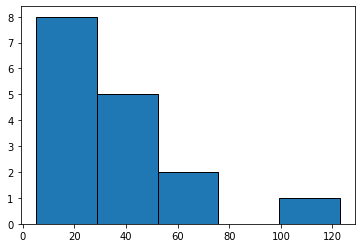

In [12]:
# by number of bins
plt.hist(hist_data, bins=5, edgecolor='black')
plt.show()

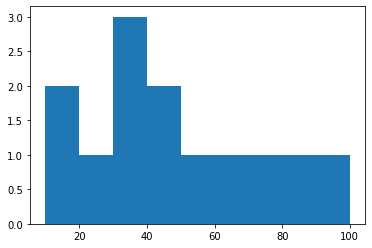

In [13]:
# by personal range
my_bins = [10, 20, 30, 40, 50, 60, 100]
plt.hist(hist_data, bins=my_bins)
plt.show()

Furthermore, the scales can also be customized.

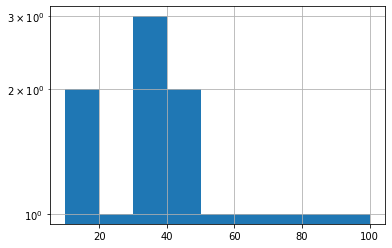

In [14]:
# log scale
plt.hist(hist_data, bins=my_bins, log=True)
plt.grid('minor','both')
plt.show()

We can also add markers, e.g. with vertical and horizontal lines

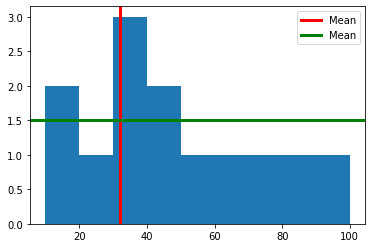

In [15]:
mean = np.mean(hist_data)

# Adding horizontal and vertical markers
plt.hist(hist_data, bins=my_bins)
plt.axvline(mean, color='red', label='Mean', linewidth=3)
plt.axhline(1.5, color='green', label='Mean', linewidth=3)
plt.legend()
plt.show()

## Basic Plotting: Scatter plots

Also, one of the most basic visualization of data. Create some random artificial data.

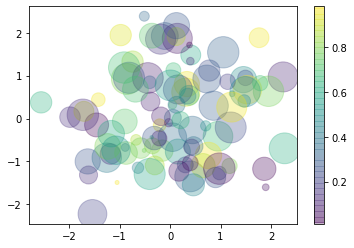

In [16]:
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000*rng.rand(100)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,
            cmap='viridis')
plt.colorbar();  # show color scale

